In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pandas

In [2]:
#load dataset
housing = fetch_california_housing(as_frame=True)

In [3]:
#convert to dataframe
df = housing.frame

In [4]:
#first five rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
#rows and columns
df.shape

(20640, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

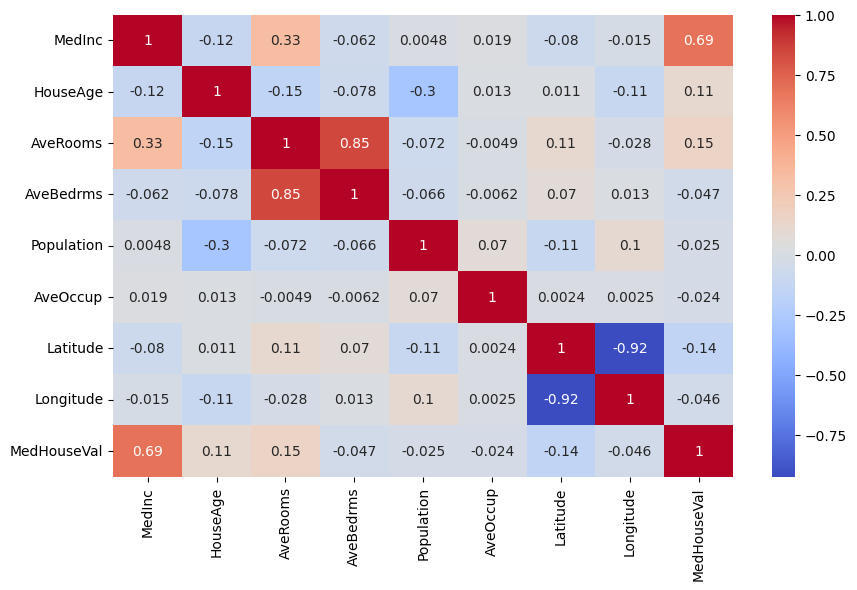

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size= 0.2,
    random_state= 42
)

In [19]:
X_train.shape

(16512, 8)

In [20]:
X_test.shape

(4128, 8)

In [ ]:
#Import Linear Regression
from sklearn.linear_model import LinearRegression
#Create Model Object
lr = LinearRegression()
#Train the Model
#Model learns the relationship between features and house price
lr.fit(X_train, y_train)
#Make Predictions
y_pred = lr.predict(X_test)

In [ ]:
#Import Evaluation Metrics
from sklearn.metrics import r2_score,mean_squared_error
#Calculate R² Score
r2 = r2_score(y_test, y_pred)
r2


0.575787706032451

In [ ]:
import numpy as np
#Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


np.float64(0.7455813830127763)

In [24]:
#Import decisiontree Regression
from sklearn.tree import DecisionTreeRegressor
#Create Model Object
dt = DecisionTreeRegressor(random_state=42)
#Train the Model
#Model learns the relationship between features and house price
dt.fit(X_train, y_train)
#Make Predictions
dt_pred = dt.predict(X_test)

In [25]:
dt_r2 = r2_score(y_test, dt_pred)
dt_r2

0.622075845135081

In [27]:
#Import random forest
from sklearn.ensemble import RandomForestRegressor
#Create Model Object
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
#Train the Model
#Model learns the relationship between features and house price
rf.fit(X_train, y_train)
#Make Predictions
rf_pred = rf.predict(X_test)

In [28]:
rf_r2 = r2_score(y_test, rf_pred)
rf_r2

0.8051230593157366